In [1]:
import sys, h5py, pdb,time, glob
from importlib import reload
import pylab as pl, numpy as np
from numpy import log10 as log
from astropy import units as un, constants as cons
import scipy, scipy.stats
from matplotlib import ticker
sys.path.append('../pysrc')

In [2]:
import FIRE_files as ff
from FIRE_files import cosmo, u
from projectPlotBasics import *
import first_pass as l
cmap = pl.get_cmap('viridis')

Behroozi+18 not loaded


In [3]:
simnames = [x.split('/')[-1] for x in glob.glob('/home/jovyan/data/data/vc*')]
len(simnames)

29

In [4]:
sims = []
for simname in simnames[:1]:
    vc = float(simname.split('_')[0][2:])
    PL_potential = l.PowerLawPotential(m=0.,vc_Rvir=vc*un.km/un.s,Rvir=200*un.kpc)
    Rcirc = float(simname.split('_')[3][5:])
    simdir = '/home/jovyan/data/data/%s/output/'%simname
    sim = l.KY_sim(simname,simdir,
                   dynamicCentering=True,recalc=False,Nsnapshots=None,
                   origin=np.zeros(3),Rcirc = Rcirc*un.kpc,
                   analyticGravity=PL_potential)
    print(sim.galaxyname, sim.Nsnapshots())
    sims.append(sim)

loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs30_Mdot1730_Rcirc10_turb 2001


In [5]:
# l.profiledir = '/home/jovyan/data/fire_analysis/radialProfiles/'
# l.figdir = '/home/jovyan/home/jovyan/fire_analysis/figures/'

In [9]:
for sim in sims[:]:
    for iSnapshot in range(sim.Nsnapshots())[-1:]:
        prof = sim.getProfiler(iSnapshot)
        zbins, dt = prof.sfh_zbins()
        stellar_ages = prof.stellar_ages(zbins)        


loaded PartType0, Coordinates
loaded PartType0, Masses
loaded PartType4, StellarFormationTime
loaded PartType4, Masses
loaded PartType4, Coordinates
saved stellar_ages


In [14]:
stellar_ages.shape

(1331,)

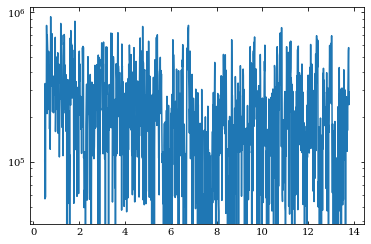

In [13]:
pl.semilogy(cosmo.age(zbins[:-1]),stellar_ages)

In [12]:
for sim in sims[-1:]:
    iSnapshots = np.linspace(1,sim.Nsnapshots()-1,4).astype(int)
    l.CGM_properties(sim, iSnapshots,Rcirc=10)

loaded PartType0, Coordinates
loaded PartType0, Masses
saved massProfile0
loaded PartType1, Masses
loaded PartType2, Masses
loaded PartType2, Coordinates
saved massProfile2
loaded PartType4, Masses
loaded PartType4, Coordinates
saved massProfile4
loaded PartType0, Coordinates
loaded PartType0, Masses
saved massProfile0
loaded PartType1, Masses
loaded PartType2, Masses
loaded PartType2, Coordinates
saved massProfile2
loaded PartType4, Masses
loaded PartType4, Coordinates
saved massProfile4
loaded PartType0, Coordinates
loaded PartType0, Masses
saved massProfile0
loaded PartType1, Masses
loaded PartType2, Masses
loaded PartType2, Coordinates
saved massProfile2
loaded PartType4, Masses
loaded PartType4, Coordinates
saved massProfile4
loaded PartType0, Coordinates
loaded PartType0, Masses
saved massProfile0
loaded PartType1, Masses
loaded PartType2, Masses
loaded PartType2, Coordinates
saved massProfile2
loaded PartType4, Masses
loaded PartType4, Coordinates
saved massProfile4
loaded PartT

../pysrc/FIRE_files.py:730: RuntimeWarning: invalid value encountered in true_divide
  self.save('j_vec_x'+suffix, hist[1,:] / hist[0,:])
../pysrc/FIRE_files.py:731: RuntimeWarning: invalid value encountered in true_divide
  self.save('j_vec_y'+suffix, hist[2,:] / hist[0,:])
../pysrc/FIRE_files.py:732: RuntimeWarning: invalid value encountered in true_divide
  self.save('j_vec_z'+suffix, hist[3,:] / hist[0,:])
../pysrc/FIRE_files.py:730: RuntimeWarning: invalid value encountered in true_divide
  self.save('j_vec_x'+suffix, hist[1,:] / hist[0,:])
../pysrc/FIRE_files.py:731: RuntimeWarning: invalid value encountered in true_divide
  self.save('j_vec_y'+suffix, hist[2,:] / hist[0,:])
../pysrc/FIRE_files.py:732: RuntimeWarning: invalid value encountered in true_divide
  self.save('j_vec_z'+suffix, hist[3,:] / hist[0,:])


loaded PartType0, Velocities
saved j_vec_x
saved j_vec_y
saved j_vec_z
saved j_vec_weight
loaded PartType0, Velocities


../pysrc/FIRE_files.py:730: RuntimeWarning: invalid value encountered in true_divide
  self.save('j_vec_x'+suffix, hist[1,:] / hist[0,:])
../pysrc/FIRE_files.py:731: RuntimeWarning: invalid value encountered in true_divide
  self.save('j_vec_y'+suffix, hist[2,:] / hist[0,:])
../pysrc/FIRE_files.py:732: RuntimeWarning: invalid value encountered in true_divide
  self.save('j_vec_z'+suffix, hist[3,:] / hist[0,:])
../pysrc/FIRE_files.py:730: RuntimeWarning: invalid value encountered in true_divide
  self.save('j_vec_x'+suffix, hist[1,:] / hist[0,:])
../pysrc/FIRE_files.py:731: RuntimeWarning: invalid value encountered in true_divide
  self.save('j_vec_y'+suffix, hist[2,:] / hist[0,:])
../pysrc/FIRE_files.py:732: RuntimeWarning: invalid value encountered in true_divide
  self.save('j_vec_z'+suffix, hist[3,:] / hist[0,:])


saved j_vec_x
saved j_vec_y
saved j_vec_z
saved j_vec_weight
loaded PartType0, Metallicity
saved Z2Zsuns_MW


../pysrc/FIRE_files.py:865: RuntimeWarning: invalid value encountered in true_divide
  normed_hist = [hist[i,:]/hist[0,:] for i in range(1,hist.shape[0])]


loaded PartType0, Metallicity
saved Z2Zsuns_MW


../pysrc/FIRE_files.py:865: RuntimeWarning: invalid value encountered in true_divide
  normed_hist = [hist[i,:]/hist[0,:] for i in range(1,hist.shape[0])]


loaded PartType0, Metallicity
saved Z2Zsuns_MW


../pysrc/FIRE_files.py:865: RuntimeWarning: invalid value encountered in true_divide
  normed_hist = [hist[i,:]/hist[0,:] for i in range(1,hist.shape[0])]


loaded PartType0, Metallicity
saved Z2Zsuns_MW


../pysrc/FIRE_files.py:865: RuntimeWarning: invalid value encountered in true_divide
  normed_hist = [hist[i,:]/hist[0,:] for i in range(1,hist.shape[0])]


loaded PartType0, Density
loaded PartType0, InternalEnergy
saved log_Ts_VW
loaded PartType0, Density
loaded PartType0, InternalEnergy
saved log_Ts_VW
loaded PartType0, Density
loaded PartType0, InternalEnergy


../pysrc/FIRE_files.py:865: RuntimeWarning: invalid value encountered in true_divide
  normed_hist = [hist[i,:]/hist[0,:] for i in range(1,hist.shape[0])]
../pysrc/FIRE_files.py:865: RuntimeWarning: invalid value encountered in true_divide
  normed_hist = [hist[i,:]/hist[0,:] for i in range(1,hist.shape[0])]
../pysrc/FIRE_files.py:865: RuntimeWarning: invalid value encountered in true_divide
  normed_hist = [hist[i,:]/hist[0,:] for i in range(1,hist.shape[0])]


saved log_Ts_VW
loaded PartType0, Density
loaded PartType0, InternalEnergy
saved log_Ts_VW


../pysrc/FIRE_files.py:865: RuntimeWarning: invalid value encountered in true_divide
  normed_hist = [hist[i,:]/hist[0,:] for i in range(1,hist.shape[0])]
../pysrc/FIRE_files.py:865: RuntimeWarning: invalid value encountered in true_divide
  normed_hist = [hist[i,:]/hist[0,:] for i in range(1,hist.shape[0])]


saved isSubsonic_VW
saved isSubsonic_VW
saved isSubsonic_VW


../pysrc/FIRE_files.py:865: RuntimeWarning: invalid value encountered in true_divide
  normed_hist = [hist[i,:]/hist[0,:] for i in range(1,hist.shape[0])]
../pysrc/FIRE_files.py:865: RuntimeWarning: invalid value encountered in true_divide
  normed_hist = [hist[i,:]/hist[0,:] for i in range(1,hist.shape[0])]
../pysrc/FIRE_files.py:865: RuntimeWarning: invalid value encountered in true_divide
  normed_hist = [hist[i,:]/hist[0,:] for i in range(1,hist.shape[0])]


saved isSubsonic_VW


../pysrc/FIRE_files.py:89: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))) * Z2Zsun )
/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.values[edge_indices]) * weight[vslice]
../pysrc/FIRE_files.py:89: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))) * Z2Zsun )
/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.values[edge_indices]) * weight[vslice]
../pysrc/FIRE_files.py:89: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))) * Z2Zsun )
/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np

saved Mdot
saved Mdot
saved Mdot
saved Mdot


In [ ]:
reload(l); reload(l.ff); reload(ff)
for sim in sims[-1:]:
    _ = sim.timeSeries(rMdot = 30*un.kpc,rVrot=5*un.kpc,multipleProcs=10,justLoad=False)
    sim.quantities_at_Rcirc()

progress:  77% 860 seconds passed
starting snapshot #312,   process id: 570
loaded PartType0, Coordinates
loaded PartType0, Masses
loaded PartType0, Coordinates
loaded PartType0, Masses


In [ ]:
for sim in sims[-1:]:
    print(sim)
    for edge_on in (True,False)[:1]:
        for iSnapshot in range(sim.Nsnapshots())[-1:]:
            l.temperature_and_pressure_movieFrame_async(sim.loadvals,iSnapshot,
            calculateProjections=True,edge_on=edge_on,lazy=True)

In [107]:
for sim in sims:
    for edge_on in (True,False):
        sim.movie(l.temperature_and_pressure_movieFrame_async,
              multipleProcs=2,
              calculateProjections=True,start=None,
              edge_on=edge_on,
              lazy=True)